### Writing Image Files

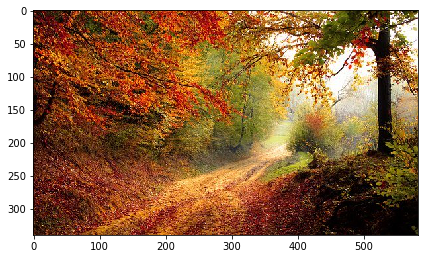

In [2]:
import skimage.io as io

img = io.imread('_images/road.jpg')
io.imshow(img)

#### Converting the image into png

In [3]:
io.imsave('_images/road.png', img)

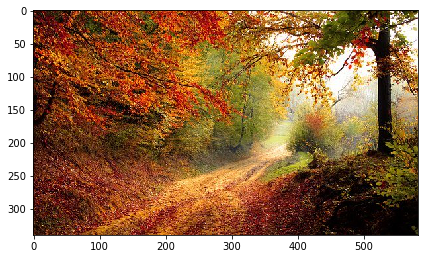

In [4]:
io.imshow(io.imread('_images/road.png'))

## Hexadecimal Dump

In [59]:
def hexdump(filePath, n):
    f = open(filePath, 'rb')        # rb for binary
    head = f.read(n)                # take first n bytes
    3
    head_hex = [hex(i)[2:].zfill(2) for i in head]   # Remove 0x make 2 character hexadescimal
    hex_data = head_hex + (-len(head_hex)%16)*['  '] # Make an array of length divisible by  16
    
    asc = ['.'] * n
    for i in range(n):
        sl = int(head_hex[i], 16)   # convert into integer
        if sl >= 32 and sl <= 126:  # in range of printable ascii characters
            asc[i] = chr(sl)
    asc = asc + (-len(head_hex)%16) * [' ']
    
    from math import ceil
    for i in range(int(ceil(n/16.0))):
        print(hex(i*16)[2:].zfill(6) + ': ' + ' '.join(hex_data[16*i+2*j]\
            + hex_data[16*i+2*j+1] for j in range(8)) + ' |' + \
              ''.join([asc[16*i+j] for j in range(16)]) + '|')
        

In [60]:
hexdump('_images/road.jpg', 160)

000000: ffd8 ffe0 0010 4a46 4946 0001 0101 012c |......JFIF.....,|
000010: 012c 0000 ffdb 0043 0005 0304 0404 0305 |.,.....C........|
000020: 0404 0405 0505 0607 0c08 0707 0707 0f0b |................|
000030: 0b09 0c11 0f12 1211 0f11 1113 161c 1713 |................|
000040: 141a 1511 1118 2118 1a1d 1d1f 1f1f 1317 |......!.........|
000050: 2224 221e 241c 1e1f 1eff db00 4301 0505 |"$".$.......C...|
000060: 0507 0607 0e08 080e 1e14 1114 1e1e 1e1e |................|
000070: 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e |................|
000080: 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e |................|
000090: 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e 1e1e ffc2 |................|


## Explanation

In [61]:
filePath = '_images/hiramon.png'
n = 76

In [62]:
f = open(filePath, 'rb') # rb for binary

In [63]:
head = f.read(n)        # take first n bytes
print(head)

b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x96\x00\x00\x00\xc8\x08\x00\x00\x00\x00/\xeeG\xb9\x00\x00O\xdaIDATx\xdaM\xfdG\xec\xb5]\x92\x1f\x86U:\xe7\t7\xfe\xf3\x1b\xbf\xd0\xfd\x85\x0e\xd3\xfd5'\xf6p\x029$\xa5\xa1"


In [64]:
head_hex = [hex(i) for i in head]
print(head_hex)

['0x89', '0x50', '0x4e', '0x47', '0xd', '0xa', '0x1a', '0xa', '0x0', '0x0', '0x0', '0xd', '0x49', '0x48', '0x44', '0x52', '0x0', '0x0', '0x0', '0x96', '0x0', '0x0', '0x0', '0xc8', '0x8', '0x0', '0x0', '0x0', '0x0', '0x2f', '0xee', '0x47', '0xb9', '0x0', '0x0', '0x4f', '0xda', '0x49', '0x44', '0x41', '0x54', '0x78', '0xda', '0x4d', '0xfd', '0x47', '0xec', '0xb5', '0x5d', '0x92', '0x1f', '0x86', '0x55', '0x3a', '0xe7', '0x9', '0x37', '0xfe', '0xf3', '0x1b', '0xbf', '0xd0', '0xfd', '0x85', '0xe', '0xd3', '0xfd', '0x35', '0x27', '0xf6', '0x70', '0x2', '0x39', '0x24', '0xa5', '0xa1']


#### Remove ``0x`` make 2 character hexadescimal

In [65]:
head_hex = [hex(i)[2:].zfill(2) for i in head]
print(head_hex)

['89', '50', '4e', '47', '0d', '0a', '1a', '0a', '00', '00', '00', '0d', '49', '48', '44', '52', '00', '00', '00', '96', '00', '00', '00', 'c8', '08', '00', '00', '00', '00', '2f', 'ee', '47', 'b9', '00', '00', '4f', 'da', '49', '44', '41', '54', '78', 'da', '4d', 'fd', '47', 'ec', 'b5', '5d', '92', '1f', '86', '55', '3a', 'e7', '09', '37', 'fe', 'f3', '1b', 'bf', 'd0', 'fd', '85', '0e', 'd3', 'fd', '35', '27', 'f6', '70', '02', '39', '24', 'a5', 'a1']


#### Make an array of length divisible by $16$

In [66]:
hex_data = head_hex + (-len(head_hex)%16)*['  ']
print(hex_data)

['89', '50', '4e', '47', '0d', '0a', '1a', '0a', '00', '00', '00', '0d', '49', '48', '44', '52', '00', '00', '00', '96', '00', '00', '00', 'c8', '08', '00', '00', '00', '00', '2f', 'ee', '47', 'b9', '00', '00', '4f', 'da', '49', '44', '41', '54', '78', 'da', '4d', 'fd', '47', 'ec', 'b5', '5d', '92', '1f', '86', '55', '3a', 'e7', '09', '37', 'fe', 'f3', '1b', 'bf', 'd0', 'fd', '85', '0e', 'd3', 'fd', '35', '27', 'f6', '70', '02', '39', '24', 'a5', 'a1', '  ', '  ', '  ', '  ']


#### Create ASCII Matrix

In [67]:
asc = ['.'] * n
print(asc)

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']


In [68]:
for i in range(n):
    sl = int(head_hex[i], 16)   # convert into integer
    if sl >= 32 and sl <= 126:  # in range of printable ascii characters
        asc[i] = chr(sl)

print(asc)

['.', 'P', 'N', 'G', '.', '.', '.', '.', '.', '.', '.', '.', 'I', 'H', 'D', 'R', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '/', '.', 'G', '.', '.', '.', 'O', '.', 'I', 'D', 'A', 'T', 'x', '.', 'M', '.', 'G', '.', '.', ']', '.', '.', '.', 'U', ':', '.', '.', '7', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '5', "'", '.', 'p', '.', '9', '$', '.', '.']


#### Make ``asc`` array of length divisible by $16$

In [69]:
asc = asc + (-len(head_hex)%16) * [' ']
print(asc)

['.', 'P', 'N', 'G', '.', '.', '.', '.', '.', '.', '.', '.', 'I', 'H', 'D', 'R', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '/', '.', 'G', '.', '.', '.', 'O', '.', 'I', 'D', 'A', 'T', 'x', '.', 'M', '.', 'G', '.', '.', ']', '.', '.', '.', 'U', ':', '.', '.', '7', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '5', "'", '.', 'p', '.', '9', '$', '.', '.', ' ', ' ', ' ', ' ']


#### Print the result

In [70]:
from math import ceil

In [71]:
for i in range(int(ceil(n/16.0))):
    print(hex(i*16)[2:].zfill(6) + ': ' + ' '.join(hex_data[16*i+2*j] + hex_data[16*i+2*j+1] for j in range(8))\
          + ' |' + ''.join([asc[16*i+j] for j in range(16)]) + '|')

000000: 8950 4e47 0d0a 1a0a 0000 000d 4948 4452 |.PNG........IHDR|
000010: 0000 0096 0000 00c8 0800 0000 002f ee47 |............./.G|
000020: b900 004f da49 4441 5478 da4d fd47 ecb5 |...O.IDATx.M.G..|
000030: 5d92 1f86 553a e709 37fe f31b bfd0 fd85 |]...U:..7.......|
000040: 0ed3 fd35 27f6 7002 3924 a5a1           |...5'.p.9$..    |
